# Load Classification Dataset

(Get training and test dataset here)

In [1]:
import tensorflow as tf

cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


# Define class names

In [2]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Sample images from the dataset

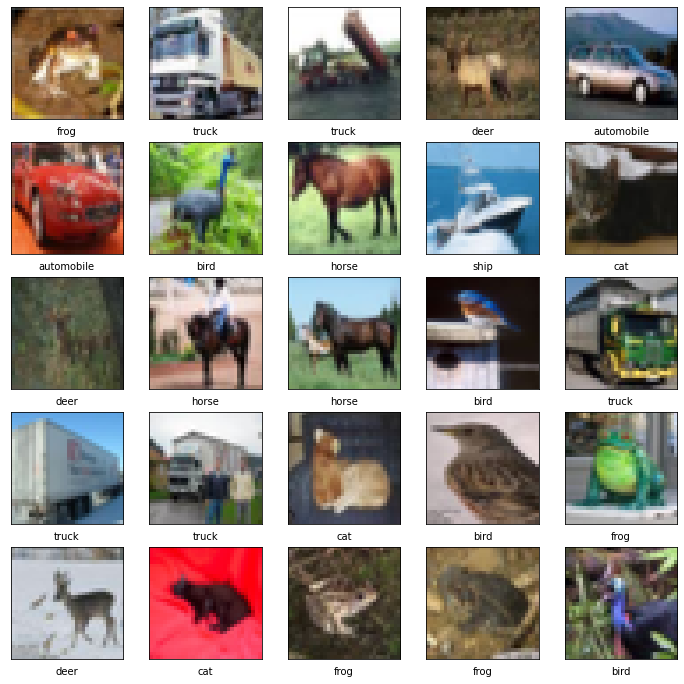

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])

plt.show()

# Feature scale images

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0 

# Without Regularization

## Testing with Sigmoid

### Create model Definition 
  - Use tf.keras.layers.Flatten for the input layer 
  - Use Dense layers with sizes: [128, 64] respectively
     - Use glorot_uniform(xavier initialization) kernel_initializer
     - Use zero initialization for biases
     - Use sigmoid as activation function
  - Use Dense layer with softmax activation for output layer with size 10
     - Use glorot_uniform(xavier initialization) kernel_initializer
     - Use zero initialization for biases
     - Use softmax as activation function

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(128, activation='sigmoid',
                          kernel_initializer='glorot_uniform',
                          bias_initializer='zeros'),
    tf.keras.layers.Dense(64, activation='sigmoid',
                          kernel_initializer='glorot_uniform',
                          bias_initializer='zeros'),
    tf.keras.layers.Dense(10, activation='softmax',
                          kernel_initializer='glorot_uniform',
                          bias_initializer='zeros') 
])

### Compile model
   - Use sgd as optimizer
      - Use learning rate of 0.01
   - Use SparseCategoricalCrossentropy(log loss) as loss
   - Use accuracy as metric

In [6]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, name='SGD'),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) 

### Fit model here
  - Use validation split of 0.2 
  - Train for 100 epochs

In [7]:
history = model.fit(train_images, train_labels, validation_split=0.2, epochs=100)

Epoch 1/100
1250/1250 [==============================] - 6s 4ms/step - loss: 2.2593 - accuracy: 0.1834 - val_loss: 2.2071 - val_accuracy: 0.2245
Epoch 2/100
1250/1250 [==============================] - 4s 3ms/step - loss: 2.1482 - accuracy: 0.2545 - val_loss: 2.0942 - val_accuracy: 0.2672
Epoch 3/100
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0518 - accuracy: 0.2827 - val_loss: 2.0211 - val_accuracy: 0.2881
Epoch 4/100
1250/1250 [==============================] - 3s 3ms/step - loss: 1.9886 - accuracy: 0.2952 - val_loss: 1.9723 - val_accuracy: 0.3033
Epoch 5/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9450 - accuracy: 0.3087 - val_loss: 1.9358 - val_accuracy: 0.3141
Epoch 6/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9129 - accuracy: 0.3229 - val_loss: 1.9096 - val_accuracy: 0.3204
Epoch 7/100
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8890 - accuracy: 0.3314 - val_loss: 1.8916 - val_ac

### Plot your training and validation  accuracy

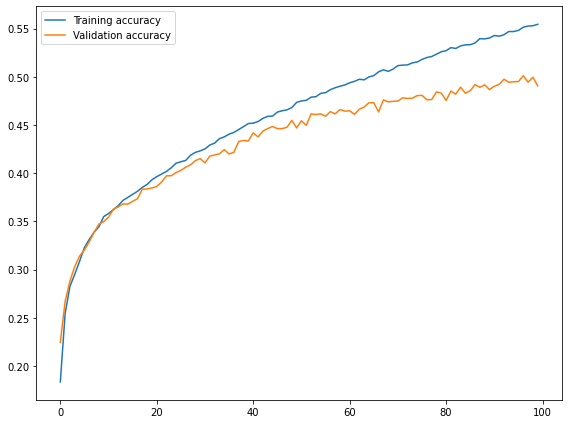

In [8]:
import pandas as pd
import numpy as np

model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(1, figsize=(8,6))
num_epochs = model_history.shape[0]

ax.plot(np.arange(0,num_epochs), model_history["accuracy"], label="Training accuracy")
ax.plot(np.arange(0,num_epochs), model_history["val_accuracy"], label="Validation accuracy")
ax.legend()
plt.tight_layout()
plt.show()

### Evaluate test dataset using fit model
Print test loss and test accuracy

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 1.4135 - accuracy: 0.5024 - 417ms/epoch - 1ms/step


## Testing with Relu

### Create model Definition 
  - Use tf.keras.layers.Flatten for the input layer 
  - Use Dense layers with sizes: [128, 64] respectively
     - Use he_uniform as kernel_initializer
     - Use zero initialization for biases
     - Use relu as activation function
  - Use Dense layer with softmax activation for output layer with size 10
     - Use glorot_uniform as kernel_initializer
     - Use zero initialization for biases
     - Use softmax as activation function

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(128, activation='relu',
                          kernel_initializer='he_uniform',
                          bias_initializer='zeros'),
    tf.keras.layers.Dense(64, activation='relu',
                          kernel_initializer='he_uniform',
                          bias_initializer='zeros'),
    tf.keras.layers.Dense(10, activation='softmax',
                          kernel_initializer='glorot_uniform',
                          bias_initializer='zeros') 
])

### Compile model
   - Use sgd as optimizer
      - Use learning rate of 0.01
   - Use SparseCategoricalCrossentropy(log loss) as loss
   - Use accuracy as metric

In [11]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, name='SGD'), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### Fit model here
  - Use validation split of 0.2 
  - Train for 100 epochs

In [12]:
history = model.fit(train_images, train_labels, validation_split=0.2, epochs=100)

Epoch 1/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9131 - accuracy: 0.3070 - val_loss: 1.8699 - val_accuracy: 0.3309
Epoch 2/100
1250/1250 [==============================] - 3s 3ms/step - loss: 1.7417 - accuracy: 0.3816 - val_loss: 1.7200 - val_accuracy: 0.3939
Epoch 3/100
1250/1250 [==============================] - 3s 3ms/step - loss: 1.6664 - accuracy: 0.4067 - val_loss: 1.6796 - val_accuracy: 0.4033
Epoch 4/100
1250/1250 [==============================] - 3s 3ms/step - loss: 1.6120 - accuracy: 0.4304 - val_loss: 1.6905 - val_accuracy: 0.4034
Epoch 5/100
1250/1250 [==============================] - 3s 3ms/step - loss: 1.5725 - accuracy: 0.4430 - val_loss: 1.5929 - val_accuracy: 0.4353
Epoch 6/100
1250/1250 [==============================] - 3s 3ms/step - loss: 1.5391 - accuracy: 0.4562 - val_loss: 1.5995 - val_accuracy: 0.4438
Epoch 7/100
1250/1250 [==============================] - 3s 3ms/step - loss: 1.5069 - accuracy: 0.4649 - val_loss: 1.5418 - val_ac

### Plot your training and validation  accuracy

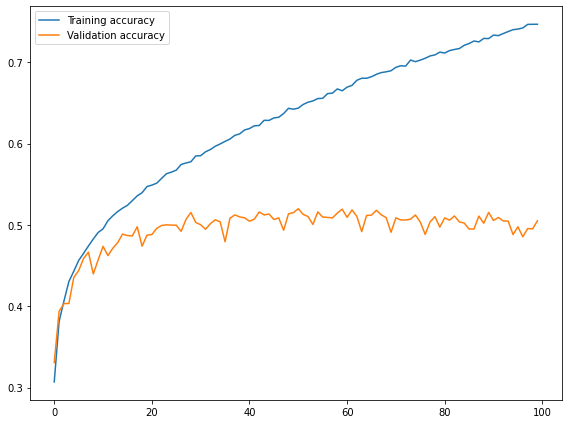

In [13]:
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

plt.figure(figsize=(8,6))
num_epochs = model_history.shape[0]

plt.plot(np.arange(0, num_epochs), model_history["accuracy"],
         label="Training accuracy")
plt.plot(np.arange(0, num_epochs), model_history["val_accuracy"],
         label="Validation accuracy")
plt.legend()
plt.tight_layout()
plt.show()

### Evaluate test dataset using fit dataset
Print test loss and test accuracy

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 1.7562 - accuracy: 0.4955 - 414ms/epoch - 1ms/step


# With Regularization

## Testing with Sigmoid

### Create model Definition 
  - Use tf.keras.layers.Flatten for the input layer 
  - Use Dense layers with sizes: [128, 64] respectively
     - Use glorot_uniform(xavier initialization) kernel_initializer
     - Use zero initialization for biases
     - Use sigmoid as activation function
     - Use L2 regularization with weight 0.001
  - Use Dense layer with softmax activation for output layer with size 10
     - Use glorot_uniform(xavier initialization) kernel_initializer
     - Use zero initialization for biases
     - Use softmax as activation function
     - Use L2 regularization with weight 0.001

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(128, activation='sigmoid',
                          kernel_initializer='glorot_uniform',
                          bias_initializer='zeros',
                          kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    tf.keras.layers.Dense(64, activation='sigmoid',
                          kernel_initializer='glorot_uniform',
                          bias_initializer='zeros',
                          kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    tf.keras.layers.Dense(10, activation='softmax',
                          kernel_initializer='glorot_uniform',
                          bias_initializer='zeros',
                          kernel_regularizer=tf.keras.regularizers.L2(0.001)) 
])

### Compile model
   - Use sgd as optimizer
      - Use learning rate of 0.01
   - Use SparseCategoricalCrossentropy(log loss) as loss
   - Use accuracy as metric

In [16]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, name='SGD'),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### Fit model here
  - Use validation split of 0.2 
  - Train for 100 epochs

In [17]:
model.fit(train_images, train_labels, validation_split=0.2, epochs=100)

Epoch 1/100
1250/1250 [==============================] - 8s 5ms/step - loss: 2.6138 - accuracy: 0.1815 - val_loss: 2.5676 - val_accuracy: 0.2383
Epoch 2/100
1250/1250 [==============================] - 7s 6ms/step - loss: 2.5115 - accuracy: 0.2525 - val_loss: 2.4538 - val_accuracy: 0.2692
Epoch 3/100
1250/1250 [==============================] - 6s 5ms/step - loss: 2.4061 - accuracy: 0.2747 - val_loss: 2.3676 - val_accuracy: 0.2804
Epoch 4/100
1250/1250 [==============================] - 6s 5ms/step - loss: 2.3324 - accuracy: 0.2873 - val_loss: 2.3101 - val_accuracy: 0.2906
Epoch 5/100
1250/1250 [==============================] - 6s 5ms/step - loss: 2.2798 - accuracy: 0.2997 - val_loss: 2.2682 - val_accuracy: 0.2962
Epoch 6/100
1250/1250 [==============================] - 7s 6ms/step - loss: 2.2406 - accuracy: 0.3088 - val_loss: 2.2337 - val_accuracy: 0.3115
Epoch 7/100
1250/1250 [==============================] - 8s 6ms/step - loss: 2.2092 - accuracy: 0.3166 - val_loss: 2.2067 - val_ac

### Plot your training and validation  accuracy

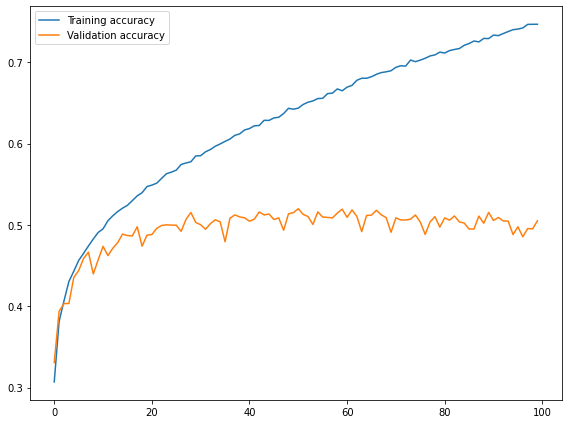

In [18]:
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

plt.figure(figsize=(8,6))
num_epochs = model_history.shape[0]

plt.plot(np.arange(0, num_epochs), model_history["accuracy"],
         label="Training accuracy")
plt.plot(np.arange(0, num_epochs), model_history["val_accuracy"],
         label="Validation accuracy")
plt.legend()
plt.tight_layout()
plt.show()

### Evaluate test dataset using fit dataset
Print test loss and test accuracy

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 1.8017 - accuracy: 0.4377 - 560ms/epoch - 2ms/step


## Testing with Relu

### Create model Definition 
  - Use tf.keras.layers.Flatten for the input layer 
  - Use Dense layers with sizes: [128, 64] respectively
     - Use he_uniform as kernel_initializer
     - Use zero initialization for biases
     - Use relu as activation function
     - Use L2 regularization with weight 0.005
  - Use Dense layer with softmax activation for output layer with size 10
     - Use glorot_uniform as kernel_initializer
     - Use zero initialization for biases
     - Use softmax as activation function
     - Use L2 regularization with weight 0.005

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(128, activation='relu',
                          kernel_initializer='he_uniform',
                          bias_initializer='zeros',
                          kernel_regularizer=tf.keras.regularizers.L2(0.005)),
    tf.keras.layers.Dense(64, activation='relu',
                          kernel_initializer='he_uniform',
                          bias_initializer='zeros',
                          kernel_regularizer=tf.keras.regularizers.L2(0.005)),
    tf.keras.layers.Dense(10, activation='softmax',
                          kernel_initializer='glorot_uniform',
                          bias_initializer='zeros',
                          kernel_regularizer=tf.keras.regularizers.L2(0.005)) 
])

### Compile model
   - Use sgd as optimizer
      - Use learning rate of 0.01
   - Use SparseCategoricalCrossentropy(log loss) as loss
   - Use accuracy as metric

In [21]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, name='SGD'),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### Fit model here
  - Use validation split of 0.2 
  - Train for 100 epochs

In [22]:
model.fit(train_images, train_labels, validation_split=0.2, epochs=100)

Epoch 1/100
1250/1250 [==============================] - 9s 7ms/step - loss: 3.7117 - accuracy: 0.3067 - val_loss: 3.4212 - val_accuracy: 0.3407
Epoch 2/100
1250/1250 [==============================] - 6s 4ms/step - loss: 3.1798 - accuracy: 0.3747 - val_loss: 3.0030 - val_accuracy: 0.3911
Epoch 3/100
1250/1250 [==============================] - 6s 4ms/step - loss: 2.8383 - accuracy: 0.3967 - val_loss: 2.7218 - val_accuracy: 0.3991
Epoch 4/100
1250/1250 [==============================] - 6s 5ms/step - loss: 2.5861 - accuracy: 0.4135 - val_loss: 2.5271 - val_accuracy: 0.3973
Epoch 5/100
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3958 - accuracy: 0.4232 - val_loss: 2.3543 - val_accuracy: 0.4096
Epoch 6/100
1250/1250 [==============================] - 8s 6ms/step - loss: 2.2456 - accuracy: 0.4324 - val_loss: 2.2124 - val_accuracy: 0.4211
Epoch 7/100
1250/1250 [==============================] - 8s 6ms/step - loss: 2.1316 - accuracy: 0.4342 - val_loss: 2.1066 - val_ac

### Plot your training and validation  accuracy

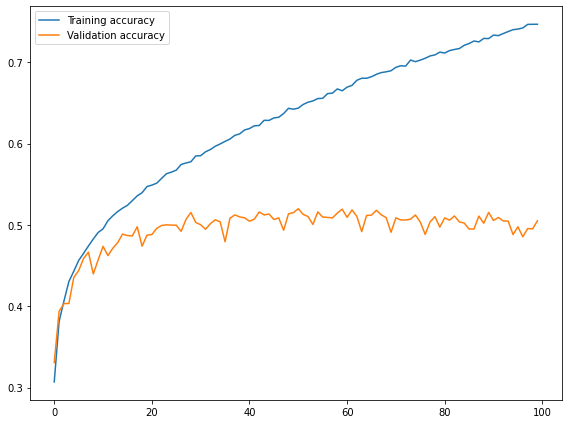

In [23]:
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

plt.figure(figsize=(8,6))
num_epochs = model_history.shape[0]

plt.plot(np.arange(0, num_epochs), model_history["accuracy"],
         label="Training accuracy")
plt.plot(np.arange(0, num_epochs), model_history["val_accuracy"],
         label="Validation accuracy")
plt.legend()
plt.tight_layout()
plt.show()

### Evaluate test dataset using fit dataset
Print test loss and test accuracy

In [24]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2) 

313/313 - 1s - loss: 1.7038 - accuracy: 0.4894 - 568ms/epoch - 2ms/step
